In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

pd.set_option("max_columns", 999)
pd.set_option("max_rows", 999)

# 모델설정
sm = SMOTE(ratio='auto', kind='regular')

Using TensorFlow backend.


In [23]:
final = pd.read_csv('dataset_with_perday.csv', index_col = 'actor_account')
model_data = final.copy()

In [24]:
model_data.head()

,login_count,logout_count,login_day_count,play_time,avg_money,ip_count,max_level,login_total_day_x,playtime_per_day,sit_count,exp_get_amout,item_get_count,exp_repair_count,money_get_count,abyss,use_portal_count,killed_by_pc,killed_by_npc,teleport_count,reborn_count,question_count,login_total_day_y,sit_count_perday,item_get_count_perday,exp_repair_count_perday,money_get_count_perday,use_portal_count_perday,teleport_count_perday,total_party_time,guild_join_count,average_party_time,class
actor_account,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20000005,259,259,1,637926,124.849465,259,0,15,42528.40000,270,389149580,31149,0,4686,0,0,47,30,376,51,62,15,18.000000,2076.600000,0.0,312.400000,0.000000,25.066667,8862.0,0.0,1477.000000,0
20000016,38,37,1,401885,43.509962,38,42,14,28706.07143,153,80119427,61579,0,1596,0,0,32,75,343,75,5893,14,10.928571,4398.500000,0.0,114.000000,0.000000,24.500000,69458.0,0.0,3655.684211,0
20000033,43,42,1,240334,-6.613812,43,38,14,17166.71429,378,142485377,24686,0,1318,0,0,35,53,337,69,97,14,27.000000,1763.285714,0.0,94.142857,0.000000,24.071429,43619.0,0.0,2295.736842,0
20000035,25,24,1,1205493,0.088531,25,0,15,80366.20000,207,1377552887,109795,0,7979,0,0,0,12,44,10,0,15,13.800000,7319.666667,0.0,531.933333,0.000000,2.933333,0.0,0.0,0.000000,0
20000051,110,109,1,457433,-32.874878,110,0,15,30495.53333,320,395099069,98368,0,3551,0,1,311,109,568,261,80,15,21.333333,6557.866667,0.0,236.733333,0.066667,37.866667,40934.0,0.0,2558.375000,0


# Model Training

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
#import xgboost as xgb

In [26]:
x = model_data.iloc[:, :-1]
y = model_data.iloc[:, -1]

In [27]:
model_data.head()

,login_count,logout_count,login_day_count,play_time,avg_money,ip_count,max_level,login_total_day_x,playtime_per_day,sit_count,exp_get_amout,item_get_count,exp_repair_count,money_get_count,abyss,use_portal_count,killed_by_pc,killed_by_npc,teleport_count,reborn_count,question_count,login_total_day_y,sit_count_perday,item_get_count_perday,exp_repair_count_perday,money_get_count_perday,use_portal_count_perday,teleport_count_perday,total_party_time,guild_join_count,average_party_time,class
actor_account,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20000005,259,259,1,637926,124.849465,259,0,15,42528.40000,270,389149580,31149,0,4686,0,0,47,30,376,51,62,15,18.000000,2076.600000,0.0,312.400000,0.000000,25.066667,8862.0,0.0,1477.000000,0
20000016,38,37,1,401885,43.509962,38,42,14,28706.07143,153,80119427,61579,0,1596,0,0,32,75,343,75,5893,14,10.928571,4398.500000,0.0,114.000000,0.000000,24.500000,69458.0,0.0,3655.684211,0
20000033,43,42,1,240334,-6.613812,43,38,14,17166.71429,378,142485377,24686,0,1318,0,0,35,53,337,69,97,14,27.000000,1763.285714,0.0,94.142857,0.000000,24.071429,43619.0,0.0,2295.736842,0
20000035,25,24,1,1205493,0.088531,25,0,15,80366.20000,207,1377552887,109795,0,7979,0,0,0,12,44,10,0,15,13.800000,7319.666667,0.0,531.933333,0.000000,2.933333,0.0,0.0,0.000000,0
20000051,110,109,1,457433,-32.874878,110,0,15,30495.53333,320,395099069,98368,0,3551,0,1,311,109,568,261,80,15,21.333333,6557.866667,0.0,236.733333,0.066667,37.866667,40934.0,0.0,2558.375000,0


In [55]:
print(list(y).count(0))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

7500


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#500개의 DT classifier만듬. 각 DT당 최대 16개의 leaf node, n_jobs -> cpu 코어 몇개 쓸지
rnd_clf = RandomForestClassifier(n_estimators=300, max_leaf_nodes=2, criterion='gini', max_depth = 3, n_jobs=6)
rnd_clf.fit(x_train, y_train)
y_pred_rf = rnd_clf.predict(x_test)

## RF Proba Manipulation

## RF Result

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf, target_names=['Human', 'Bot']))

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
print("Accuracy: %.2f" %accuracy_score(y_test, y_pred_rf))
print("F1 score: %.2f" %f1_score(y_test, y_pred_rf))

## Proba Manipulation Result

In [ ]:
rf_proba = rnd_clf.predict_proba(x_test)[:,0]

x = np.arange(0, 1.01, 0.01)
y = np.arange(0, 1.01, 0.01)
z = np.arange(0, 1.01, 0.01)

for i in np.arange(0, 1.01, 0.01):
    y_pred_rf = ((rf_proba) > i).astype(int)
    y[int(i*100)] = accuracy_score(y_test, y_pred_rf)
    z[int(i*100)] = f1_score(y_test, y_pred_rf)

In [ ]:
max(z)

In [ ]:
ax = plt.subplot(111)

ax.plot(x, y, label='acc')
ax.plot(x, z, label='f1')

ax.set(xlabel='proba', ylabel='score', title='Proba Manipulation RF')
ax.legend(loc='upper left')
ax.grid()

# Smote RF with Proba Manipulation

In [ ]:
# train데이터를 넣어 복제함

x = model_data.iloc[:, :-1]
y = model_data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

X_resampled, Y_resampled = sm.fit_sample(x_train,y_train)

#500개의 DT classifier만듬. 각 DT당 최대 16개의 leaf node, n_jobs -> cpu 코어 몇개 쓸지
rnd_clf = RandomForestClassifier(n_estimators=300, max_leaf_nodes=2, criterion='gini', max_depth = 3, n_jobs=6)
rnd_clf.fit(X_resampled, Y_resampled)
y_pred_rf = rnd_clf.predict_proba(x_test)[:,1]

In [ ]:
x1 = np.arange(0, 1.01, 0.01)
y1 = np.arange(0, 1.01, 0.01)
z1 = np.arange(0, 1.01, 0.01)

from sklearn.metrics import accuracy_score, f1_score

for i in np.arange(0, 1.01, 0.01):
    y_pred = ((y_pred_rf) > i).astype(int)
    y1[int(i*100)] = accuracy_score(y_test, y_pred)
    z1[int(i*100)] = f1_score(y_test, y_pred)

In [ ]:
ax = plt.subplot(111)

ax.plot(x1, y1, label='acc')
ax.plot(x1, z1, label='f1')

ax.set(xlabel='proba', ylabel='score', title='Proba Manipulation RF Smote')
ax.legend(loc='upper left')
ax.grid()

# 로지스틱

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0, 1))
# scaler.fit_transform(x_train)
# x_train = scaler.fit_transform(x_train)

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(estimators=[("lr", log_clf),("rf", rnd_clf),("svc", svm_clf)], voting="hard")

log_clf.fit(x_train, y_train)
#log_clf.fit(X_resampled, Y_resampled)
# y_pred = log_clf.predict(X_test)
pred_log = log_clf.predict_proba(x_test)[:,1]

In [ ]:
pred_log

In [ ]:
x1 = np.arange(0, 1.01, 0.01)
y1 = np.arange(0, 1.01, 0.01)
z1 = np.arange(0, 1.01, 0.01)

from sklearn.metrics import accuracy_score, f1_score

for i in np.arange(0, 1.01, 0.01):
    y_pred = ((pred_log) > i).astype(int)
    y1[int(i*100)] = accuracy_score(y_test, y_pred)
    z1[int(i*100)] = f1_score(y_test, y_pred)

In [ ]:
ax = plt.subplot(111)

ax.plot(x1, y1, label='acc')
ax.plot(x1, z1, label='f1')

ax.set(xlabel='proba', ylabel='score', title='Proba Manipulation RF Smote')
ax.legend(loc='upper left')
ax.grid()

In [ ]:
from sklearn.ensemble import IsolationForest

# train데이터를 넣어 복제함

x = model_data.iloc[:, :-1]
y = model_data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

X_resampled, Y_resampled = sm.fit_sample(x_train,y_train)

#500개의 DT classifier만듬. 각 DT당 최대 16개의 leaf node, n_jobs -> cpu 코어 몇개 쓸지
if_clf = IsolationForest(n_estimators=1000, max_samples=100, n_jobs=6)
if_clf.fit(X_resampled, Y_resampled)
y_pred_if = if_clf.score_samples(x_test)

In [ ]:
plt.plot(y_pred_if)

In [ ]:
x1 = np.arange(min(y_pred_if), max(y_pred_if)+0.01, 0.01)
y1 = np.arange(min(y_pred_if), max(y_pred_if)+0.01, 0.01)
z1 = np.arange(min(y_pred_if), max(y_pred_if)+0.01, 0.01)

for i in range(0, len(x1)):
    y_pred = ((y_pred_if ) < x1[i]).astype(int)
    y1[i] = accuracy_score(y_test, y_pred)
    z1[i] = f1_score(y_test, y_pred)

In [ ]:
ax = plt.subplot(111)

ax.plot(x1, y1, label='acc')
ax.plot(x1, z1, label='f1')

ax.set(xlabel='proba', ylabel='score', title='Isolation Forest')
ax.legend(loc='upper left')
ax.grid()

# LocalOutlierFactor

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [ ]:
y_pred_lof = clf.fit_predict(x)

In [7]:
y_pred = (y_pred_lof == -1).astype(int)

NameError: name 'y_pred_lof' is not defined

In [ ]:
f1_score(y, y_pred)

In [8]:
X_scores = clf.negative_outlier_factor_

NameError: name 'clf' is not defined

In [ ]:
X_scores

In [ ]:
x1 = np.arange(min(X_scores), max(X_scores)+0.01, 0.01)
y1 = np.arange(min(X_scores), max(X_scores)+0.01, 0.01)
z1 = np.arange(min(X_scores), max(X_scores)+0.01, 0.01)

for i in range(0, len(x1)):
    y_pred = ((X_scores) < x1[i]).astype(int)
    y1[i] = accuracy_score(y, y_pred)
    z1[i] = f1_score(y, y_pred)

In [ ]:
ax = plt.subplot(111)

ax.plot(x1, y1, label='acc')
ax.plot(x1, z1, label='f1')

ax.set(xlabel='proba', ylabel='score', title='Isolation Forest')
ax.legend(loc='upper left')
ax.grid()

# xgboost

In [28]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [30]:
xgb_model = xgb.XGBClassifier(n_estimators=1000,
                        n_jobs=6,
                        max_depth=5,
                        learning_rate=0.1,
                        gamma = 0,
                        subsample = 0.8,
                        scale_pos_weight = 1,
                        min_child_weight=1,
                        colsample_bytree=0.8,
                        objective= 'binary:logistic',
                        nthread=4,
                        missing=-999,
                        seed=27,
                        tree_method='gpu_hist')

In [31]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=-999, n_estimators=1000, n_jobs=6,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, tree_method='gpu_hist', verbosity=1)

In [32]:
prediction = xgb_model.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score, f1_score
f1_score(y_test, prediction)

0.8328611898016997

In [33]:
xgb_model.feature_importances_

array([2.8629379e-02, 1.6886234e-02, 1.2786556e-03, 6.2233146e-02,
       2.7592054e-02, 1.9049717e-02, 4.2327367e-02, 1.2700224e-01,
       9.3459077e-02, 2.2861008e-02, 5.2357871e-02, 2.1795874e-02,
       1.4262404e-05, 1.5159355e-02, 4.7373783e-04, 2.2787312e-02,
       1.6814567e-02, 1.3175764e-02, 1.9455444e-02, 1.9317560e-02,
       4.1164793e-02, 1.5578516e-01, 3.5965491e-02, 2.5396399e-02,
       0.0000000e+00, 2.1855056e-02, 1.6967380e-02, 1.5763965e-02,
       2.9299775e-02, 1.7111290e-02, 1.8020056e-02], dtype=float32)

<BarContainer object of 33 artists>

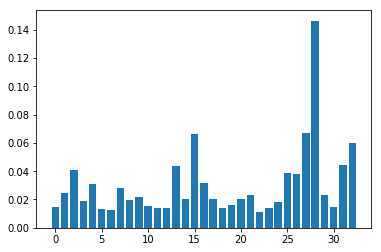

In [31]:
plt.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)

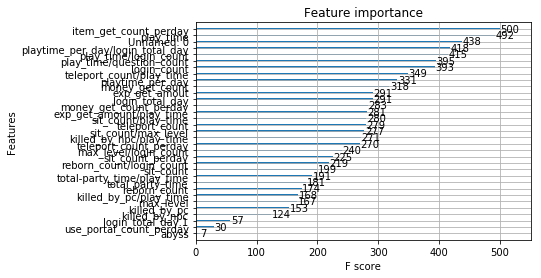

In [32]:
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(xgb_model)
pyplot.show()

In [33]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

# make predictions for test data and evaluate
y_pred = xgb_model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(xgb_model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(xgb_model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(x_train)
	# train model
	selection_model = xgb.XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(x_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	f1 = f1_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%, f1: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0, f1*100.0))

Accuracy: 97.57%
Thresh=0.011, n=33, Accuracy: 97.24%, f1: 80.91%
Thresh=0.013, n=32, Accuracy: 97.24%, f1: 80.80%
Thresh=0.014, n=31, Accuracy: 97.12%, f1: 80.11%
Thresh=0.014, n=30, Accuracy: 97.12%, f1: 80.11%
Thresh=0.014, n=29, Accuracy: 97.12%, f1: 80.11%
Thresh=0.014, n=28, Accuracy: 97.16%, f1: 80.34%
Thresh=0.014, n=27, Accuracy: 97.16%, f1: 80.34%
Thresh=0.014, n=26, Accuracy: 97.12%, f1: 80.11%
Thresh=0.015, n=25, Accuracy: 97.28%, f1: 81.14%
Thresh=0.015, n=24, Accuracy: 97.08%, f1: 79.89%
Thresh=0.016, n=23, Accuracy: 97.20%, f1: 80.57%
Thresh=0.018, n=22, Accuracy: 97.24%, f1: 80.80%
Thresh=0.019, n=21, Accuracy: 97.37%, f1: 81.50%
Thresh=0.019, n=20, Accuracy: 97.28%, f1: 81.14%
Thresh=0.020, n=19, Accuracy: 97.28%, f1: 81.14%
Thresh=0.020, n=18, Accuracy: 97.16%, f1: 80.34%
Thresh=0.020, n=17, Accuracy: 97.37%, f1: 81.61%
Thresh=0.022, n=16, Accuracy: 97.28%, f1: 81.14%
Thresh=0.023, n=15, Accuracy: 97.16%, f1: 80.34%
Thresh=0.023, n=14, Accuracy: 97.16%, f1: 80.34%
Thr

## Grid Search

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [57]:
max_depth = [8]
min_child_weight = [3]
gamma = [0]
subsample = [0.8]
colsample_bytree = [0.7]
reg_alpha = [0.3]

random_grid = {'min_child_weight': min_child_weight,
               'max_depth': max_depth,
               'gamma': gamma,
               'subsample': subsample,
               'colsample_bytree': colsample_bytree,
               'reg_alpha': reg_alpha}
print(random_grid)

{'min_child_weight': [3], 'max_depth': [8], 'gamma': [0], 'subsample': [0.8], 'colsample_bytree': [0.7], 'reg_alpha': [0.3]}


In [14]:
from joblib import Parallel
Parallel(max_nbytes=None)

Parallel(n_jobs=1)

In [58]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
xgb_model = xgb.XGBClassifier(n_estimators=1000,
                        n_jobs=6,
                        learning_rate=0.1,
                        gamma = 0,
                        subsample = 0.8,
                        scale_pos_weight = 1,
                        colsample_bytree=0.8,
                        objective= 'binary:logistic',
                        nthread=4,
                        missing=-999,
                        seed=27,
                        tree_method='gpu_hist')
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
xgb_grid =  GridSearchCV(xgb_model, param_grid =  random_grid, scoring ='f1', cv = 3, n_jobs = 2)
# Fit the random search model
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=-999, n_estimators=1000, n_jobs=6,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, tree_method='gpu_hist', verbosity=1)

In [59]:
xgb_grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [38]:
xgb_model = xgb.XGBClassifier(n_estimators=1000,
                        n_jobs=6,
                        learning_rate=0.1,
                        gamma = 0,
                        subsample = 0.8,
                        scale_pos_weight = 1,
                        colsample_bytree=0.7,
                        objective= 'binary:logistic',
                        nthread=4,
                        missing=-999,
                        seed=27,
                        min_child_weight=3,
                        reg_alpha=0.3,
                        tree_method='gpu_hist')
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=-999, n_estimators=1000, n_jobs=6,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, tree_method='gpu_hist', verbosity=1)

In [60]:
proba_xgb = xgb_model.predict_proba(x_test)[:,1]

## proba manipulation

In [61]:
x1 = np.arange(0, 1.01, 0.01)
y1 = np.arange(0, 1.01, 0.01)
z1 = np.arange(0, 1.01, 0.01)

from sklearn.metrics import accuracy_score, f1_score

for i in np.arange(0, 1.01, 0.01):
    y_pred = ((proba_xgb) > i).astype(int)
    y1[int(i*100)] = accuracy_score(y_test, y_pred)
    z1[int(i*100)] = f1_score(y_test, y_pred)

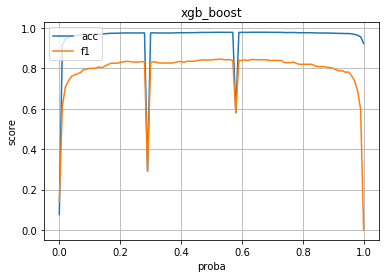

In [62]:
ax = plt.subplot(111)

ax.plot(x1, y1, label='acc')
ax.plot(x1, z1, label='f1')

ax.set(xlabel='proba', ylabel='score', title='xgb_boost')
ax.legend(loc='upper left')
ax.grid()

In [63]:
max(z1)

0.8461538461538461

In [34]:
xgb_model = xgb.XGBClassifier(n_estimators=5000,
                        n_jobs=6,
                        learning_rate=0.01,
                        gamma = 0,
                        subsample = 0.8,
                        scale_pos_weight = 1,
                        colsample_bytree=0.7,
                        objective= 'binary:logistic',
                        nthread=4,
                        missing=-999,
                        seed=27,
                        min_child_weight=3,
                        reg_alpha=0.3,
                        tree_method='gpu_hist')
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=-999, n_estimators=5000, n_jobs=6,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, tree_method='gpu_hist', verbosity=1)

In [35]:
proba_xgb = xgb_model.predict_proba(x_test)[:,1]

In [36]:
x1 = np.arange(0, 1.01, 0.01)
y1 = np.arange(0, 1.01, 0.01)
z1 = np.arange(0, 1.01, 0.01)

from sklearn.metrics import accuracy_score, f1_score

for i in np.arange(0, 1.01, 0.01):
    y_pred = ((proba_xgb) > i).astype(int)
    y1[int(i*100)] = accuracy_score(y_test, y_pred)
    z1[int(i*100)] = f1_score(y_test, y_pred)

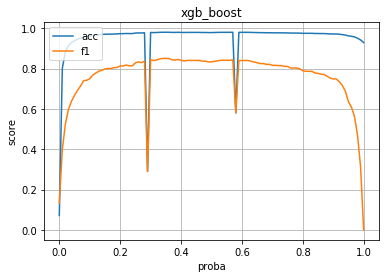

In [37]:
ax = plt.subplot(111)

ax.plot(x1, y1, label='acc')
ax.plot(x1, z1, label='f1')

ax.set(xlabel='proba', ylabel='score', title='xgb_boost')
ax.legend(loc='upper left')
ax.grid()

In [38]:
max(z1)

0.8501529051987767

In [17]:
max(y1)

0.9753086419753086

In [49]:
z1

array([0.1457459 , 0.46133683, 0.56260163, 0.61538462, 0.6628131 ,
       0.69076305, 0.71548117, 0.72844828, 0.73799127, 0.74501109,
       0.75170843, 0.76388889, 0.76923077, 0.77725118, 0.78657074,
       0.78832117, 0.7902439 , 0.79802956, 0.8019802 , 0.79800499,
       0.8040201 , 0.81012658, 0.81218274, 0.81218274, 0.81424936,
       0.81329923, 0.8134715 , 0.8134715 , 0.81984334, 0.29      ,
       0.81675393, 0.81675393, 0.82228117, 0.82228117, 0.81283422,
       0.80965147, 0.81182796, 0.81182796, 0.81081081, 0.80978261,
       0.80991736, 0.80991736, 0.81440443, 0.81666667, 0.8189415 ,
       0.82352941, 0.82352941, 0.82485876, 0.82386364, 0.82386364,
       0.82051282, 0.82051282, 0.82051282, 0.82051282, 0.82285714,
       0.8252149 , 0.8252149 , 0.82318841, 0.58      , 0.82318841,
       0.82318841, 0.82318841, 0.82318841, 0.82798834, 0.8245614 ,
       0.82111437, 0.820059  , 0.820059  , 0.820059  , 0.820059  ,
       0.820059  , 0.8189911 , 0.8189911 , 0.81791045, 0.82035

## proba manipulation 3

In [18]:
xgb_model = xgb.XGBClassifier(n_estimators=10000,
                        n_jobs=6,
                        learning_rate=0.001,
                        gamma = 0,
                        subsample = 0.8,
                        scale_pos_weight = 1,
                        colsample_bytree=0.7,
                        objective= 'binary:logistic',
                        nthread=4,
                        missing=-999,
                        seed=27,
                        min_child_weight=3,
                        reg_alpha=0.3,
                        tree_method='gpu_hist')
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.001, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=-999, n_estimators=10000, n_jobs=6,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, tree_method='gpu_hist', verbosity=1)

In [19]:
proba_xgb = xgb_model.predict_proba(x_test)[:,1]

In [20]:
x1 = np.arange(0, 1.01, 0.01)
y1 = np.arange(0, 1.01, 0.01)
z1 = np.arange(0, 1.01, 0.01)

from sklearn.metrics import accuracy_score, f1_score

for i in np.arange(0, 1.01, 0.01):
    y_pred = ((proba_xgb) > i).astype(int)
    y1[int(i*100)] = accuracy_score(y_test, y_pred)
    z1[int(i*100)] = f1_score(y_test, y_pred)

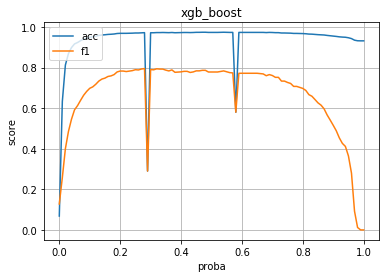

In [21]:
ax = plt.subplot(111)

ax.plot(x1, y1, label='acc')
ax.plot(x1, z1, label='f1')

ax.set(xlabel='proba', ylabel='score', title='xgb_boost')
ax.legend(loc='upper left')
ax.grid()

In [22]:
z1

array([0.12788906, 0.25811823, 0.4       , 0.48465267, 0.54511971,
       0.5915493 , 0.6125    , 0.63876652, 0.66357309, 0.68257757,
       0.6977887 , 0.705     , 0.71794872, 0.73350923, 0.74331551,
       0.74796748, 0.75616438, 0.75900277, 0.76536313, 0.77840909,
       0.78285714, 0.78285714, 0.78034682, 0.7826087 , 0.78488372,
       0.78947368, 0.78823529, 0.79289941, 0.79518072, 0.29      ,
       0.79027356, 0.78899083, 0.79384615, 0.79256966, 0.79245283,
       0.78730159, 0.78343949, 0.78846154, 0.77669903, 0.77777778,
       0.77887789, 0.78145695, 0.78145695, 0.77591973, 0.77852349,
       0.78378378, 0.78378378, 0.78644068, 0.78644068, 0.778157  ,
       0.778157  , 0.778157  , 0.778157  , 0.78082192, 0.78350515,
       0.77931034, 0.77508651, 0.77351916, 0.58      , 0.77192982,
       0.77192982, 0.77192982, 0.77192982, 0.77192982, 0.77192982,
       0.77192982, 0.77031802, 0.76868327, 0.75985663, 0.76534296,
       0.76086957, 0.75182482, 0.75182482, 0.73333333, 0.73333

# creating labels for submission

In [24]:
xgb_model = xgb.XGBClassifier(n_estimators=5000,
                        n_jobs=6,
                        learning_rate=0.01,
                        gamma = 0,
                        subsample = 0.8,
                        scale_pos_weight = 1,
                        colsample_bytree=0.7,
                        objective= 'binary:logistic',
                        nthread=4,
                        missing=-999,
                        seed=27,
                        min_child_weight=3,
                        reg_alpha=0.3,
                        tree_method='gpu_hist')
xgb_model.fit(x, y)

NameError: name 'x' is not defined

In [ ]:
test = pd.read_csv('dataset_for_creating_labels_for_submission.csv', index_col = 'Unnamed: 0')
test_data = test.copy()

In [25]:
accounts = pd.read_csv('test_accounts.csv')

In [26]:
test_accounts = pd.merge(accounts, test_data, how='inner', on = "account")

NameError: name 'test_data' is not defined

In [ ]:
ts = test_accounts.copy()

In [27]:
del ts['account']

NameError: name 'ts' is not defined

In [ ]:
accounts.head()

In [ ]:
result = (xgb_model.predict_proba(ts)[:,1] > 0.41)

In [28]:
result = result.astype(int)

NameError: name 'result' is not defined

In [ ]:
result = pd.DataFrame(result)

In [ ]:
result.to_csv('result.csv')

In [ ]:
result

In [29]:
np.sum(result)

NameError: name 'result' is not defined